In [1]:
# install dependencies

%pip install -qqU diffusers transformers bitsandbytes accelerate ftfy datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 46.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.6/92.6 MB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 kB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.7/493.7 kB 36.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 64.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 85.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 17.2 MB/s eta 0:00:00


In [2]:
# go to runtime --> change runtime type --> T4 GPU for faster inference times
# will have to restart runtime after changing runtime type
# only run this cell once per session

# loading up the model...
from diffusers import StableDiffusionPipeline
import torch

model_id = "riffusion/riffusion-model-v1"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16).to("cuda")
pipe.load_lora_weights("MouseTrap/StyleGen-Loopster-DL")

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

unet/diffusion_pytorch_model.safetensors not found


Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.
/usr/local/lib/python3.10/dist-packages/diffusers/pipelines/stable_diffusion/pipeline_stable_diffusion.py:178: FutureWarning: The configuration file of the unet has set the default `sample_size` to smaller than 64 which seems highly unlikely. If your checkpoint is a fine-tuned version of any of the following: 
- CompVis/stable-diffusion-v1-4 
- CompVis/stable-diffusion-v1-3 
- CompVis/stable-diffusion-v1-2 
- CompVis/stable-diffusion-v1-1 
- runwayml/stable-diffusion-v1-5 
- runwayml/stable-diffusion-inpainting 
 you should change 'sample_size' to 64 in the configuration fil

In [3]:
# connect google drive for saving the image
# only run this cell once per session

from google.colab import drive
drive.mount("/content/drive/")

%cd '/content/drive/MyDrive/stylegen_paper_v2_results'

Mounted at /content/drive/
/content/drive/MyDrive/stylegen_paper_v2_results


In [ ]:
# get spectrogram to audio converter by downloading riff-cnet
!git clone https://github.com/zachary-shah/riff-cnet.git

Cloning into 'riff-cnet'...
remote: Enumerating objects: 42778, done.
remote: Counting objects: 100% (1885/1885), done.
remote: Compressing objects: 100% (1679/1679), done.
remote: Total 42778 (delta 195), reused 1880 (delta 190), pack-reused 40893
Receiving objects: 100% (42778/42778), 3.66 GiB | 18.40 MiB/s, done.
Resolving deltas: 100% (397/397), done.
Updating files: 100% (841/841), done.


In [4]:
%cd riff-cnet

/content/drive/MyDrive/stylegen_paper_v2_results/riff-cnet


In [5]:
!pip install Pillow==9.4.0
!pip install einops
!pip install omegaconf
!pip install pytorch_lightning
#2.0.1+cu118
!pip install transformers==4.30.2
!pip install open-clip-torch
!pip install pydub

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.3-py3-none-any.whl size=144554 sha256=d59247688fa3b9c1fe8b18f841133933f5c344c2b1dd05fa50d4c12758cce191
  Stored in directory: /root/.cache/pip/wheels/12/93/dd/1f6a127edc45659556564c5730f6d4e300888f4bca2d4c5a88
Successfully built antlr4-python3-runtime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 774.6/774.6 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.2/805.2 kB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 28.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 86.6 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.14.1
    Uninstalling tokenizers-0.14.1:
      Successfully uninstalled tokenizers-0.14.1
  Attempting uninstall: transformers
    Found existing installation: transformers 4.35.0
    Uninstalling transformers-4.35.0:
      Successfully uninstalled transformers-4.35.0


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 40.0 MB/s eta 0:00:00


In [6]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import einops
from pytorch_lightning import seed_everything
import cv2
import os
from PIL import Image
import numpy as np
import random

from riffusion.spectrogram_image_converter import SpectrogramImageConverter
from riffusion.spectrogram_converter import SpectrogramConverter
from riffusion.spectrogram_params import SpectrogramParams

In [7]:
# enter a prompt here, <loopster-style> should be in the prompt
# edit the string below, and then run the cell everytime you use a new prompt

prompt = 'Loopster style, create an energetic and catchy tune that makes people want to get up and dance, incorporating lively rhythms and an uplifting melody'

  0%|          | 0/50 [00:00<?, ?it/s]

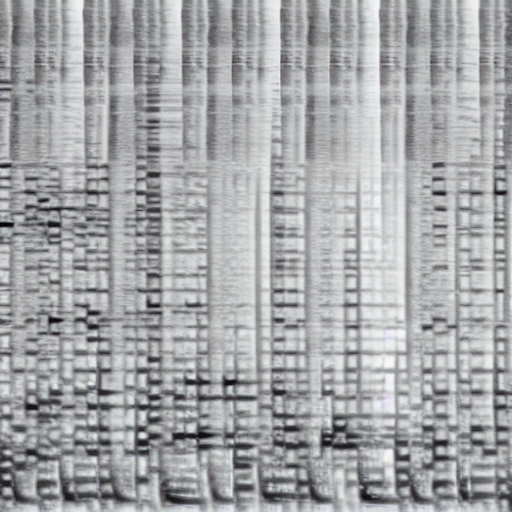

In [8]:
# this code generates the image

image = pipe(prompt, num_inference_steps=50).images[0]
image

In [9]:
# Save the spectrogram to your Google Drive (include full path of folder, then name the file)
# it might take a second to see the image in your google drive
image.save(f'/content/drive/MyDrive/stylegen_paper_v2_results/generated_spectrograms/{prompt}.png')

In [10]:
sample_img = Image.open(f'/content/drive/MyDrive/stylegen_paper_v2_results/generated_spectrograms/{prompt}.png')

img_converter_to_audio = SpectrogramImageConverter(SpectrogramParams(sample_rate=44100, min_frequency=0, max_frequency=10000))


out_audio_recon = img_converter_to_audio.audio_from_spectrogram_image(sample_img, apply_filters=True).set_channels(2)
out_audio_recon.export(f'/content/drive/MyDrive/stylegen_paper_v2_results/generated_audio/{prompt}.wav', format="wav")
out_audio_recon